<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Вычислительной техники </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Системы искусственного интеллекта и машинное обучение» </font></center>
<br>

Выполнил студент группы АТМ-25:
- Сахнов М.Д

Проверил: Осипенко И.В

<center>  Новосибирск, 2025  </center>


# Лабораторная работа #1

## Цель работы

Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявлению и описанию зависимостей в исходных данных с использованием языка программирования Python.

# Работа с данными

## Подключение библиотек

In [2]:
# Проверка версии и пути к выбранному интерпретатору
import sys
print(f"Версия Python - {sys.version}")
print(f"Путь к интерпретатору Python - {sys.executable}")

Версия Python - 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
Путь к интерпретатору Python - C:\Programs\Python310x64\python.exe


In [3]:
# Python 3.10
import pandas as pd
import numpy  as np

import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [4]:
# Проверка версий библиотек
for lib in [pd, np, sklearn]:
    print(f"{lib.__name__:<12} {lib.__version__}")

pandas       2.1.2
numpy        1.26.1
sklearn      1.3.2


## Загрузка входных данных

Данные "diamonds_nan_24" содержат информацию об оценке стоимости алмазов. Имеющиеся столбцы (признаки объекта)
- price: Цена в долларах США
- carat: Вес алмаза
- cut: Качество вырезки (Fair, Good, Very Good, Premium, Ideal)
- color: цвет алмаза from J (worst) to D (best)
- clarity: мера того на сколько чист алмаз (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: длинна в мм
- y: высота в мм
- z: ширина в мм
- depth: глубина
- table: ширина вершины алмаза относительно самой широкой точки
  

<b> Путь к файлу вида "./datasets/diamonds_nan_24.zip" имеет следующее расположение:
```
WorkDir/
├─ datasets/
│  └─ daimonds_nan_24.zip
├─ 1.ЛР-1.ipynb
```
</b>


Для загрузки табличных данных из файла применятся функция .read_csv() с указанием параметров (путь, кодировка, разделитель, обработка колонок с заголовками или датой...)



In [5]:
df = pd.read_csv(
    './datasets/diamonds_nan_24.zip', # путь к файлу через символ "/", (используйте автодополнение)
    sep       = '\t' ,
    decimal   = ',' ,
    header    = 0,  # если заголовки в нулевой строке таблицы,
    na_values =  ['isntKnown'], # доп. символы для обозначения отсутствующих значений
)

df[0:2] # отобразить первые строки таблицы df

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31


## Осмотр данных / Первичный анализ

### Размер таблицы

Атрибут  __DataFrame.shape__ возвращает два значения соответствующей таблице - [кол-во строк, кол-во столбов]

In [6]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(53940, 11)
Итого: 53940 записи, 11 столбец (признак).


### Проверка соответствия типов данных для признаков.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       53918 non-null  float64
 1   carat    53918 non-null  float64
 2   cut      53917 non-null  object 
 3   color    53919 non-null  object 
 4   clarity  53918 non-null  object 
 5   depth    53918 non-null  float64
 6   table    53909 non-null  float64
 7   price    53916 non-null  float64
 8   x        53924 non-null  float64
 9   y        53914 non-null  float64
 10  z        53918 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.5+ MB


На основании полученной информации можно сделать вывод о том, что все признаки обладают соответствующими им типами данных

### Признаки

In [8]:
# описание для числовых значений. Оператор ".T" транспонирует матрицу для удобства чтения
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,53918.0,26969.156775,15571.226610,1.0,13483.25,26969.50,40454.75,53940.00
carat,53918.0,0.797964,0.474026,0.2,0.40,0.70,1.04,5.01
depth,53918.0,61.749662,1.432544,43.0,61.00,61.80,62.50,79.00
table,53909.0,57.457564,2.234701,43.0,56.00,57.00,59.00,95.00
price,53916.0,3933.043048,3989.504432,326.0,950.00,2401.00,5324.25,18823.00
x,53924.0,5.731093,1.121738,0.0,4.71,5.70,6.54,10.74
y,53914.0,5.734673,1.142057,0.0,4.72,5.71,6.54,58.90
z,53918.0,3.538762,0.705747,0.0,2.91,3.53,4.04,31.80


Так же в таблице содержатся столбцы со строковыми типами данных.

In [9]:
# описание для НЕ числовых значений, при их наличии
if (df.dtypes == 'object').sum() >0:
    print(df.describe(include=['object', 'bool']).T )

         count unique    top   freq
cut      53917      5  Ideal  21544
color    53919      7      G  11288
clarity  53918      8    SI1  13059


Получим список всех столбцов, при помощи атрибута  __DataFrame.columns__

In [10]:
df.columns

Index(['ID', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

## Удаление признаков (столбцов)

По скольку столбец ID не несет для нас полезной информации, удалим его исползуя функцию `df.drop`

In [11]:
# Удалить столбцы из таблицы можно только один раз
df = df.drop (
    labels = ['ID' ], # список названий столбцов
    axis=1
    )
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
print ("Итого: " + str(df.shape[0]) + " записи, " + str(df.shape[1]) + " столбец (признак).")

Итого: 53940 записи, 10 столбец (признак).


## Пропущенные значения

Используем функцию isna(), которая формирует соответствующую __таблицу-маску__ совпадающую по размеру с исходной, но каждое значение __маски__ - логический индикатор True|False в соостветствии с заданым условием.

- True  - исходное ячейка не содержала значения или содержала индикатор о пропуске;
- False - исходное ячейка распознана как корректно заполненная.

In [13]:
df.isna()[-3:]

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False
53939,False,False,False,False,False,False,False,False,False,False


Используем комбинацию функций isna() и sum() для определения количества пропущенных значений в исходном наборе данных по каждому признаку

In [14]:
print ( df.isna().sum() ) # используем print для компактного вывода

carat      22
cut        23
color      21
clarity    22
depth      22
table      31
price      24
x          16
y          26
z          22
dtype: int64


Для понимания как распределены отсутствующие значения в исходной таблице, попробуем получить графическое изображение __таблицы-маски__

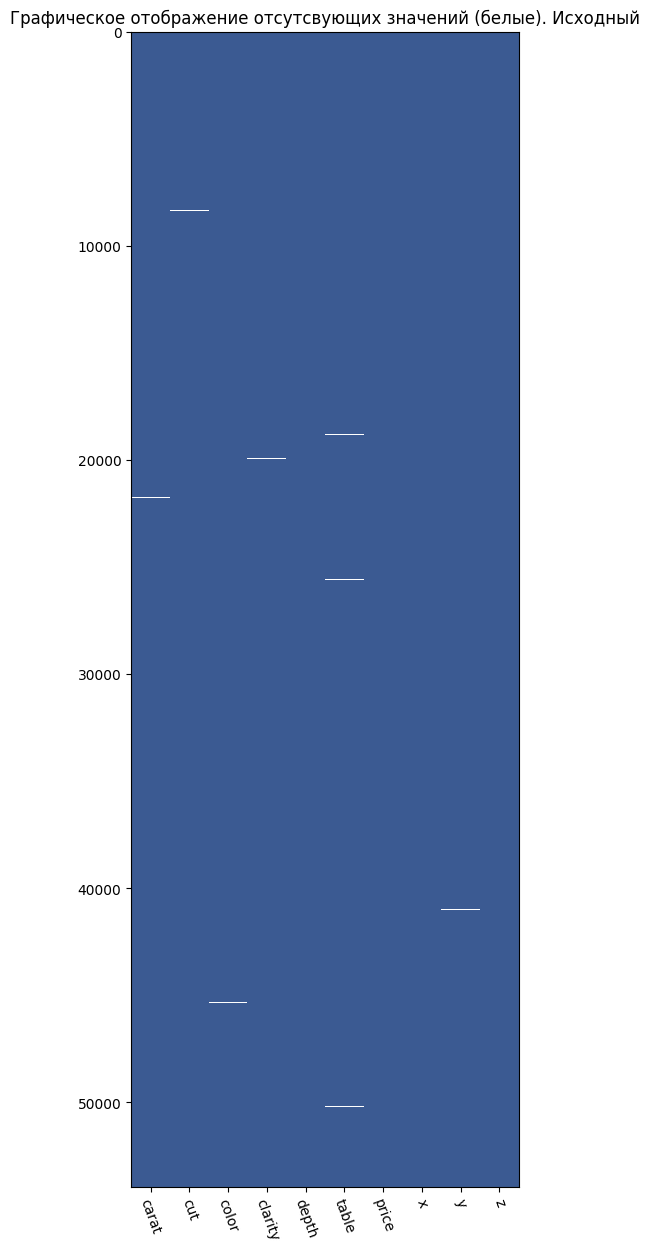

In [15]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7

    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(dataF.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH)) # создать полотно для рисования, figsize-размер в дюймах

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра
    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), # выбор цветовой шкалы, аналог cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]    # режим соотнощения сторон
                interpolation= 'none',)                         # отключить размытие
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)
    plt.grid(False) # Сетка
#-------------------------------------
# Вызов функции с указанием параметров
plotTableNA( dataF=df, addToTilte="Исходный" )

Отсутвующие значения будут препятсвовать дальнейшим расчётам и анализу данных.

Перед дальнейшими действиями следует обработать пропущенные значения. Варианты обработки:
- Вар.1. заполнить вычисленными значениями, рассчитанными на основе имеющихся значений признака (средние, мин., макс., и т.д.)
- Вар.2. исключить строки или столбцы:
  - Вар.2.1. исключить строки, в которых присутствуют пропущенные значения
  - Вар.2.2. исключить столбцы, в которых присутствуют пропущенные значения

Функция `.dropna` удалит строки или столбцы с пропусками, в зависимости от выбранного режима. По умолчанию `.dropna` не изменяет изходную таблицу, поэтому выполним её для проверки.

In [16]:
print("Размер исходного DataFrame", df.shape)
print("Вар.2.1. Размер при исключении по строкам",  df.dropna(axis='index', how='any').shape)
print("Вар.2.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (53940, 10)
Вар.2.1. Размер при исключении по строкам (53711, 10)
Вар.2.2. Размер при исключении по столбцам (53940, 0)


Так как в нашем наборе пропущенные значения имеются в каждом признаке, но в небольшом количестве, то ничего лучшего не остается кроме как применить исключение по строкам

In [17]:
# axis='index'   - режим удаление строк, в которых есть пропуски
# axis='columns' - режим удаление столбцов, в которых есть пропуски
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (53711, 10)


Необходимо убедится в том, ожидаемый результат совпадает с фактическим.

In [18]:
print (df.isna().sum()) # используем print для компактного вывода

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [19]:
print ("Итого: " + str(df.shape[0]) + " записи, " + str(df.shape[1]) + " столбец (признак).")

Итого: 53711 записи, 10 столбец (признак).


## Преобразование к числовыму типу категориальных признаков

На текущем этапе в таблице присутствуют не числовые столбцы (тип данных object):
- с категориальными и строковыми значениями
- строковые значения означающие дату и время

Для использование в анализе данных их необходимо преобразовать к числовым значениям (тип данных int, float) определёнными способами.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53711 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53711 non-null  float64
 1   cut      53711 non-null  object 
 2   color    53711 non-null  object 
 3   clarity  53711 non-null  object 
 4   depth    53711 non-null  float64
 5   table    53711 non-null  float64
 6   price    53711 non-null  float64
 7   x        53711 non-null  float64
 8   y        53711 non-null  float64
 9   z        53711 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB


В нашем случае категориальными признаками являются шкалы цвета, чистоты и качества обрезки


In [21]:
df.describe(include=['object', 'bool']).T  # описание для не числовых значений

,count,unique,top,freq
cut,53711,5,Ideal,21466
color,53711,7,G,11247
clarity,53711,8,SI1,13012


### Замена значений (mapping)

Для замены на числовые значений строковых, которые описывают дискретные состояния наших трех шкал используем метод mapping

In [22]:
df["clarity"].nunique() # получить количество уникальных значений в столбце

8

In [23]:
df['clarity'].unique() # получить массив уникальных значений в столбце

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

Следующим шагом используем функцию `.map`, в качестве параметра передадим словарь соответсвий (пары ключ=значение).

Необходимо указать соответствия для ВСЕХ уникальных значений, иначе значения, для которых не будет указано правило заменятся на NaN.

In [24]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
# применить карту соотвествий имеющихся и новых значений. Тип данных результата - int, т.к. замена на числа
df['clarity_grade'] = df['clarity'].map(
  {
    'I1'  : 1,
    'SI1' : 3,
    'SI2' : 2,
    'VS1' : 4,
    'VS2' : 4,
    'VVS1' : 5,
    'VVS2' : 5,
    'IF' : 6,
  }
)
df[[ 'clarity' , 'clarity_grade']] [:2]

,clarity,clarity_grade
0,SI2,2
1,SI1,3


Далее поступим аналогичным образом со столбцами 'color' и 'cut'

In [25]:
df['color'].unique() # получить массив уникальных значений в столбце

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [26]:
df['color_grade'] = df['color'].map(
  {
    'D' : 7,
    'E' : 6,
    'F' : 5,
    'G' : 4,
    'H' : 3,
    'I' : 2,
    'J' : 1,
  }
)
df[[ 'color' , 'color_grade']] [:2]

,color,color_grade
0,E,6
1,E,6


In [27]:
df['cut'].unique() # получить массив уникальных значений в столбце

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
df['cut_grade'] = df['cut'].map(
  {
    'Fair' : 1,
    'Good' : 2,
    'Very Good' : 3,
    'Premium' : 4,
    'Ideal' : 5,
  }
)
df[[ 'cut' , 'cut_grade']] [:2]

,cut,cut_grade
0,Ideal,5
1,Premium,4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53711 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53711 non-null  float64
 1   cut            53711 non-null  object 
 2   color          53711 non-null  object 
 3   clarity        53711 non-null  object 
 4   depth          53711 non-null  float64
 5   table          53711 non-null  float64
 6   price          53711 non-null  float64
 7   x              53711 non-null  float64
 8   y              53711 non-null  float64
 9   z              53711 non-null  float64
 10  clarity_grade  53711 non-null  int64  
 11  color_grade    53711 non-null  int64  
 12  cut_grade      53711 non-null  int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 5.7+ MB


Удалим лишние столбцы

In [30]:
df = df.drop (
    labels = ['cut', 'color', 'clarity' ],# список названий столбцов
    axis=1
    )
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_grade',
       'color_grade', 'cut_grade'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53711 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53711 non-null  float64
 1   depth          53711 non-null  float64
 2   table          53711 non-null  float64
 3   price          53711 non-null  float64
 4   x              53711 non-null  float64
 5   y              53711 non-null  float64
 6   z              53711 non-null  float64
 7   clarity_grade  53711 non-null  int64  
 8   color_grade    53711 non-null  int64  
 9   cut_grade      53711 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 4.5 MB


Таким образом мы получили таблицу только с числовыми типами данных

# Выбор целевого значения и признаков для анализа данных

## Корреляция

* __Коэффициент корреляции r-Пирсона__
  
  Мера линейной взаимосвязи переменных, при нелинейной взаимосвязи непоказателен. Не устойчив к выбросам в выборке. Учитывает числовые значения. Переменные должны иметь нормальное распределение. Изменяется в пределах от -1 до +1.

![Drag Racing](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Correlation_examples.png/400px-Correlation_examples.png)

Построим матрицу корреляции - матрицу значений коэфф. корреляции Пирсона для возможных комбинай пар.

In [32]:
corr_df = df.corr(method='pearson')
corr_df

,carat,depth,table,price,x,y,z,clarity_grade,color_grade,cut_grade
carat,1.000000,0.028318,0.182417,0.921513,0.975088,0.951616,0.953282,-0.361398,-0.291540,-0.135428
depth,0.028318,1.000000,-0.295878,-0.010793,-0.025175,-0.029253,0.095057,-0.067816,-0.046949,-0.218507
table,0.182417,-0.295878,1.000000,0.127774,0.196208,0.184579,0.151726,-0.159534,-0.026896,-0.433190
price,0.921513,-0.010793,0.127774,1.000000,0.884396,0.865296,0.861090,-0.144425,-0.172434,-0.053748
x,0.975088,-0.025175,0.196208,0.884396,1.000000,0.974595,0.970675,-0.376793,-0.270335,-0.126111
y,0.951616,-0.029253,0.184579,0.865296,0.974595,1.000000,0.951827,-0.363266,-0.263599,-0.121968
z,0.953282,0.095057,0.151726,0.861090,0.970675,0.951827,1.000000,-0.371771,-0.268213,-0.149915
clarity_grade,-0.361398,-0.067816,-0.159534,-0.144425,-0.376793,-0.363266,-0.371771,1.000000,-0.012129,0.192545
color_grade,-0.291540,-0.046949,-0.026896,-0.172434,-0.270335,-0.263599,-0.268213,-0.012129,1.000000,0.020438
cut_grade,-0.135428,-0.218507,-0.433190,-0.053748,-0.126111,-0.121968,-0.149915,0.192545,0.020438,1.000000


Для того, чтобы визуально оценить величину коэффициентов корреляции, постоим тепловую карту по значениям взаимозависимости признаков выборки.

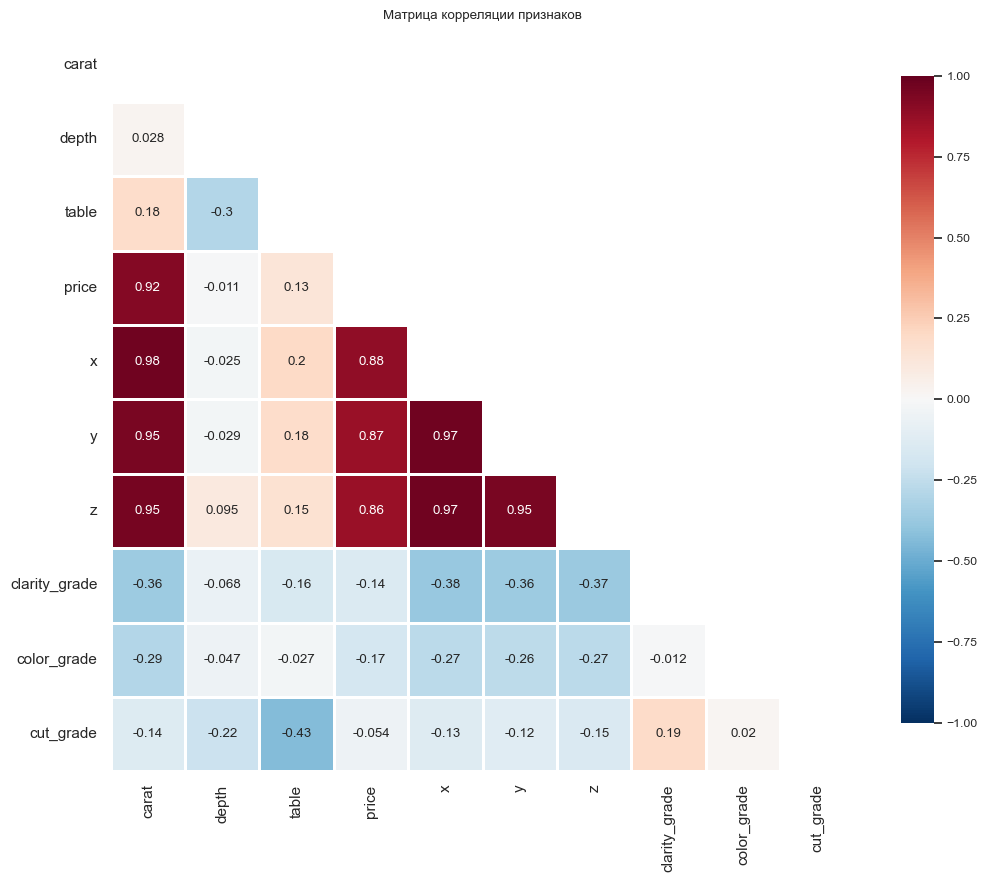

In [33]:
import matplotlib.pyplot as plt
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_df,   ### <<<- объект-матрица корреляции
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu_r',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');


Получим столбец для целевого признака.

In [34]:
corr_df["price"]

carat            0.921513
depth           -0.010793
table            0.127774
price            1.000000
x                0.884396
y                0.865296
z                0.861090
clarity_grade   -0.144425
color_grade     -0.172434
cut_grade       -0.053748
Name: price, dtype: float64

Для удобства восприятия получим абсолютные величины и отсортируем их.

In [35]:
# Последовательное применение операции:
# - получить единственный столбец,
# - получить абсолютные значения,
# - отсортировать
corr_df[['price']].abs().sort_values(by="price")

,price
depth,0.010793
cut_grade,0.053748
table,0.127774
clarity_grade,0.144425
color_grade,0.172434
z,0.861090
y,0.865296
x,0.884396
carat,0.921513
price,1.000000


В качестве целевой переменной выберем признак:
- **'price'** - Стоимость.


В качестве основных независимых переменных выберем следующие признаки, так как они наиболее высоко коррелириют с целевой переменной и наименее между собой:
  * **'carat'** - Вес
  * **'clarity_grade'**-  Шкала чистоты
  * **'color_grade'** - Шкала цвета

Также для проведения дополнительных исследований возьмем три дополнительные признака, которые имеют высокий коэф. корреляции с целевым признаком, но при этом между собой также сильно коррелируют
  * **'x'** - Длина
  * **'y'** - Ширина
  * **'z'** - Высота
  
  

Составим списко исходный и целевой переменных

In [70]:
features = ['carat', 'color_grade', 'clarity_grade', 'x', 'y', 'z', 'cut_grade' ]
target   = ['price']

# Просмотр характеристик выбранных признаков

<Figure size 700x700 with 0 Axes>

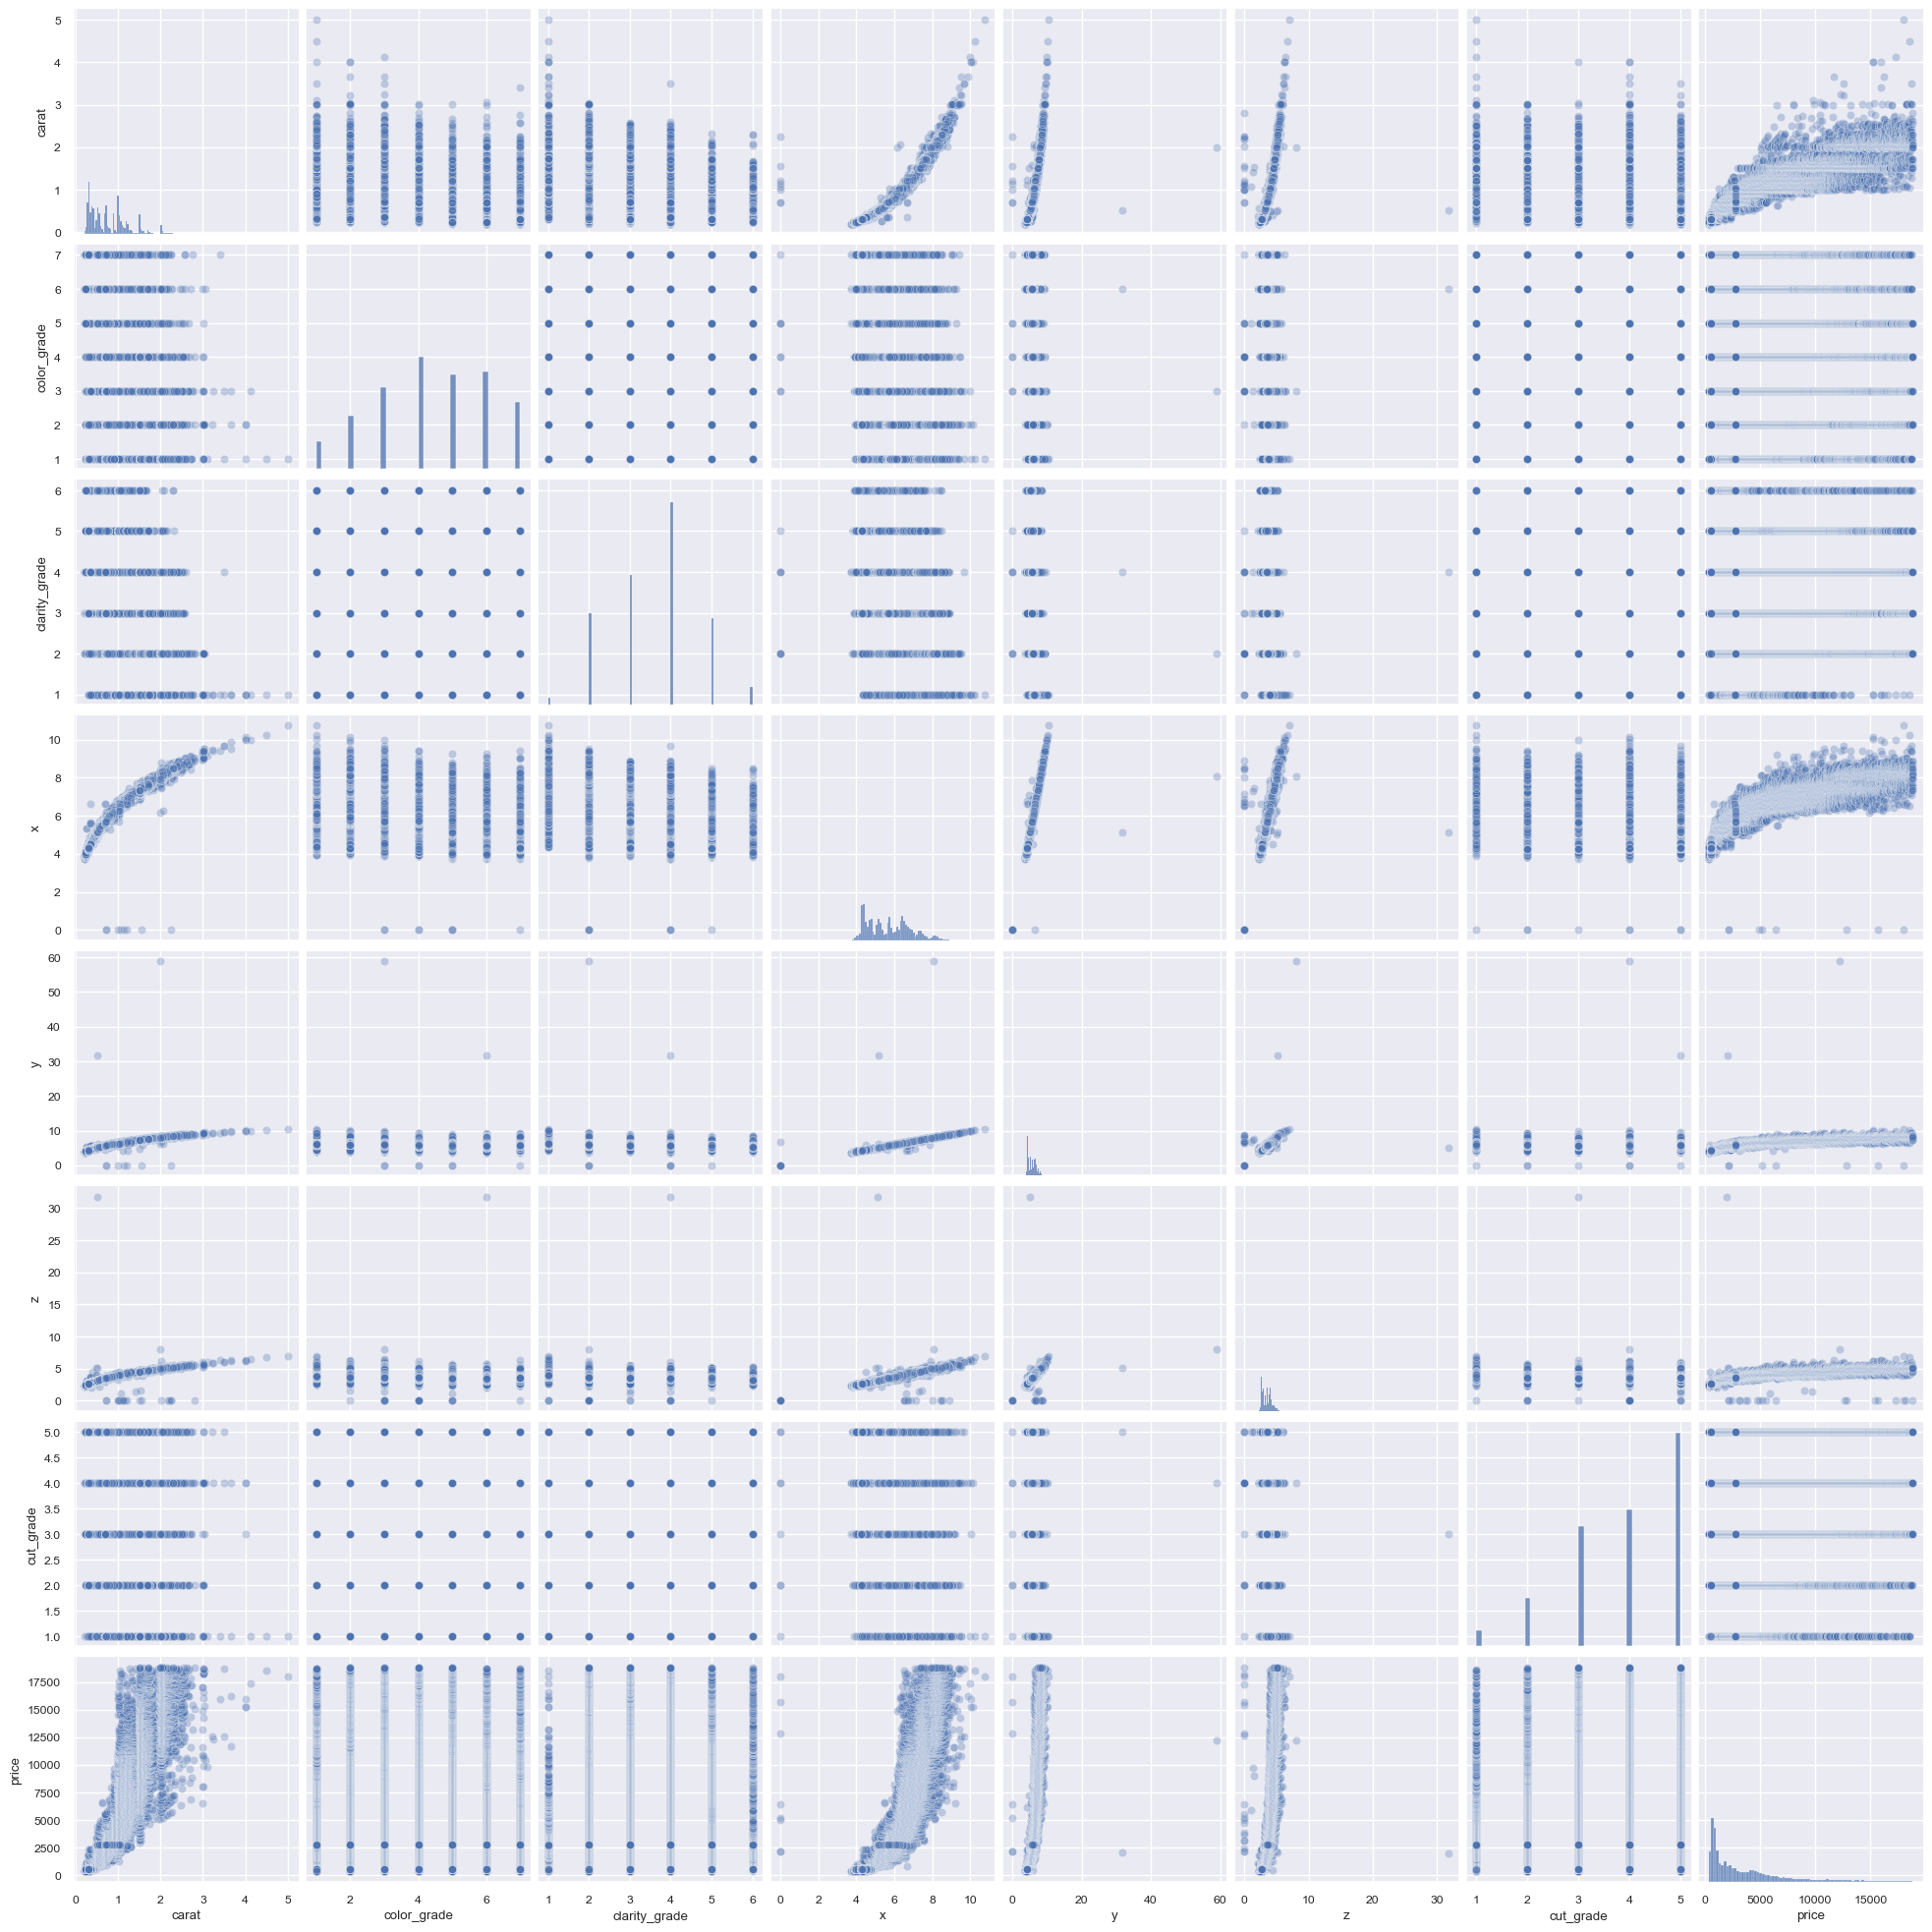

In [71]:
 # График признаков попарно
 plt.figure(figsize=(7,7))
 %config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

 sns.pairplot(
     df[features + target],
     #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter
     diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
     plot_kws={'alpha':0.3} # прозрачность точек
 );

## Поиск и обработка выбросов

Судя по виду графиков рассеяния в "пустых областях" присутствуют малое кол-во объектов, т.е. в выборе присутствуют аномально малые или большие значения - "выбросы". Для их фильтрации выберем граничные значения с помощью диаграмм размаха (boxplot). 

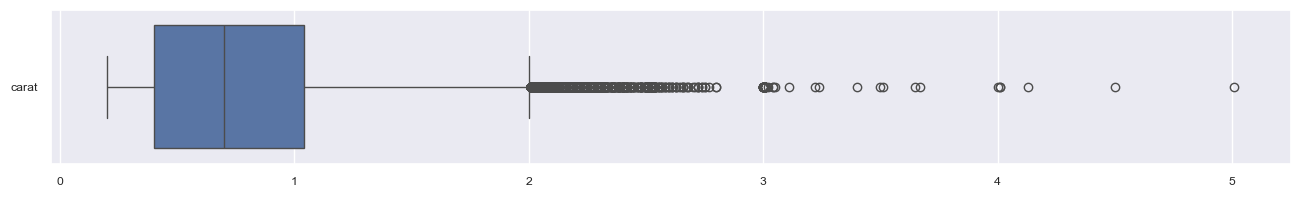

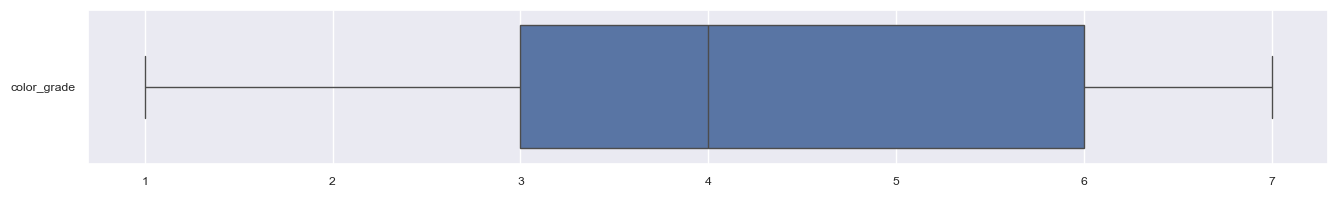

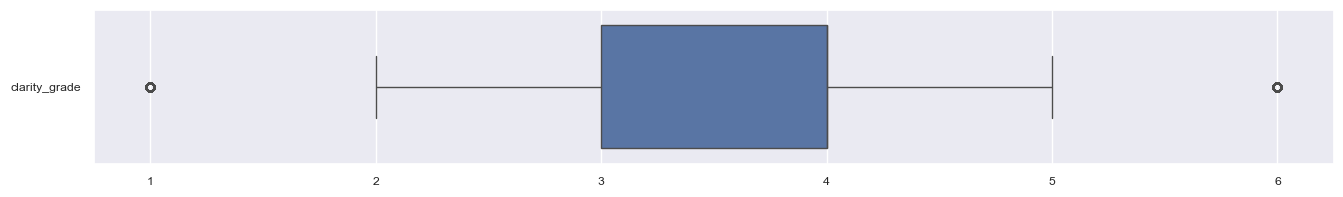

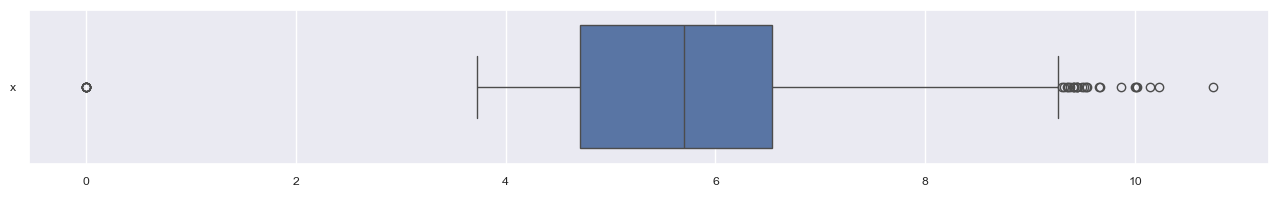

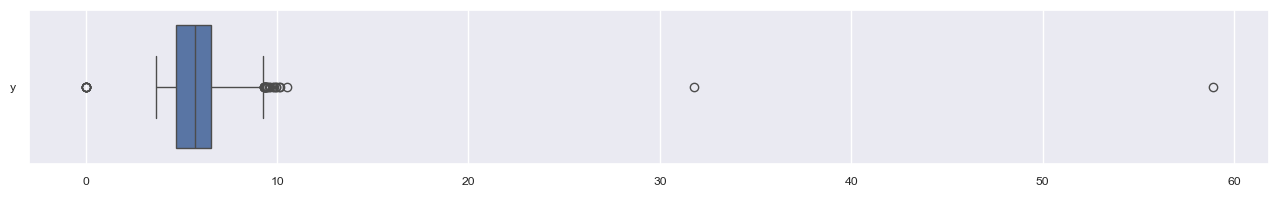

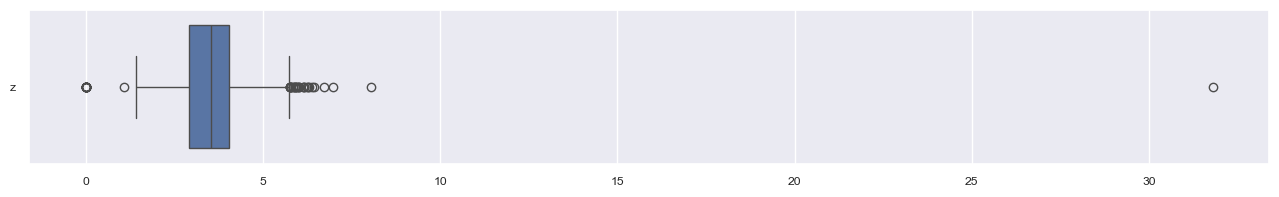

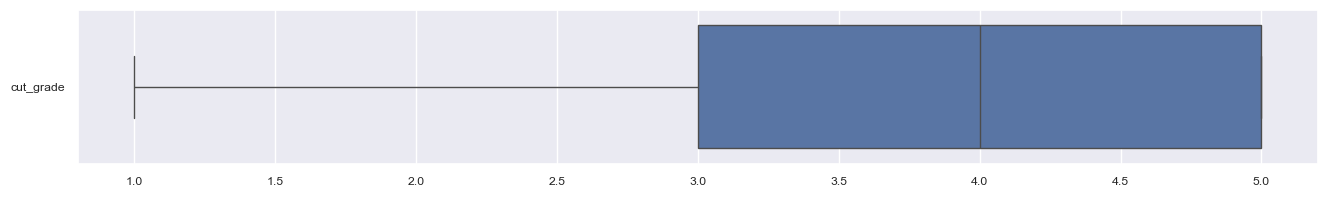

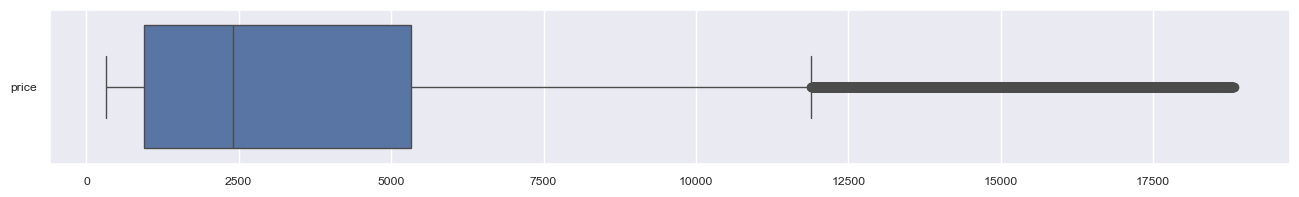

In [72]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features+target):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=df[[feature_name]], # данные
                 orient='h' # ориентация графика
               )

Установим границы значений, для тех объектов таблицы, которые должны остаться

In [75]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = {
    'carat'     : (0,2.5)            , # караты
    'color_grade' : (1, 7)     , # шкала цвета
    'clarity_grade'  : (2, 5)        , # шкала чистоты
    'price'     : (0, 15000) , # цена
    'x' : (4, 9),
    'y' : (3, 8),
    'z' : (2.5, 5),
    'cut_grade' : (2.0, 5.0)
}

print (tressholdDict)

{'carat': (0, 2.5), 'color_grade': (1, 7), 'clarity_grade': (2, 5), 'price': (0, 15000), 'x': (4, 9), 'y': (3, 8), 'z': (2.5, 5), 'cut_grade': (2.0, 5.0)}


Проверим, какая часть данных выходит за пределы границ значений


In [76]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df[
                            ~((df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                          ]
                    )

    dcount = df[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

carat. Принимаем пороговые значение равными (0, 2.5).
  Кол-во эл. вне пороговых - 125 из 53711 значение(ий) (0.2%)

color_grade. Принимаем пороговые значение равными (1, 7).
  Кол-во эл. вне пороговых - 0 из 53711 значение(ий) (0.0%)

clarity_grade. Принимаем пороговые значение равными (2, 5).
  Кол-во эл. вне пороговых - 2521 из 53711 значение(ий) (4.7%)

price. Принимаем пороговые значение равными (0, 15000).
  Кол-во эл. вне пороговых - 1649 из 53711 значение(ий) (3.1%)

x. Принимаем пороговые значение равными (4, 9).
  Кол-во эл. вне пороговых - 493 из 53711 значение(ий) (0.9%)

y. Принимаем пороговые значение равными (3, 8).
  Кол-во эл. вне пороговых - 1779 из 53711 значение(ий) (3.3%)

z. Принимаем пороговые значение равными (2.5, 5).
  Кол-во эл. вне пороговых - 2102 из 53711 значение(ий) (3.9%)

cut_grade. Принимаем пороговые значение равными (2.0, 5.0).
  Кол-во эл. вне пороговых - 1604 из 53711 значение(ий) (3.0%)



Отфильтруем значения которые находятся вне пороговых.

In [77]:
# Во избежание путаницы создадим для полседующих операций копию исходного объетка
df_digPlusFiltred = df.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]


    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_digPlusFiltred = df_digPlusFiltred[
        (df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax)
        ]
    print("Обработан ", feature_name )


print ("Отброшено {} строк. Осталось {} строк.".format(
    len(df)  - len(df_digPlusFiltred),
    len(df_digPlusFiltred))
)

Обработан  carat
Обработан  color_grade
Обработан  clarity_grade
Обработан  price
Обработан  x
Обработан  y
Обработан  z
Обработан  cut_grade
Отброшено 6898 строк. Осталось 46813 строк.


carat 0.24 2.04
color_grade 1 7
clarity_grade 2 5
x 4.0 8.19
y 3.98 8.0
z 2.5 5.0
cut_grade 2 5
price 334.0 15000.0


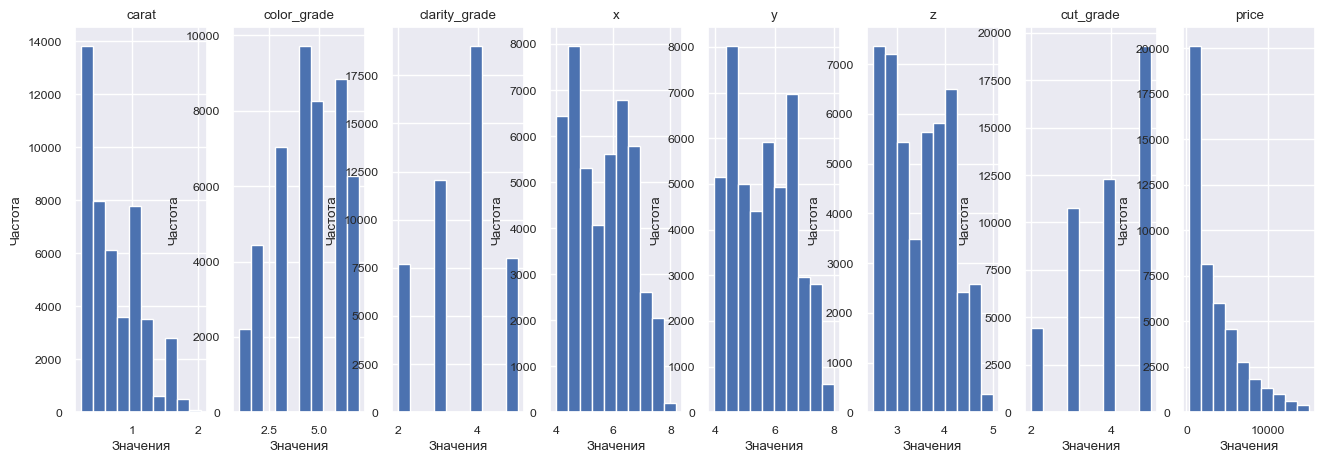

In [78]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1

    plt.subplot(1, len(features+target), plot_number)

    plt.hist(df_digPlusFiltred[feature_name]) # Построение гистрограммы

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name,
           df_digPlusFiltred[feature_name].min(),
           df_digPlusFiltred[feature_name].max())

## Сохранение данных

In [79]:
df_digPlusFiltred.to_csv('./datasets/diamonds_data_PREPARED.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

## Формирование тренировочной и проверочной выборок

Для обучения и проверки качества модели применяют прием заключающийся в разделении исходной выборки на части:

    - Обучающую (Train) - данные, на которых модель формирует коэффициенты
    - Проверочную (Test) - данные, которые предъявляют обученной модели для получения и сравнения вычисленных(Predicted) значений.

Для разделения воспользуемся функцией `train_test_split` из пакета sklearn


In [80]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_digPlusFiltred[features],    # исходные данные X
    df_digPlusFiltred[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

In [81]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test),
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))

Кол-во элементов: 
  x_train: 32769, y_train 32769 
  x_test:  14044, y_test  14044 
  total x: 46813, total y 46813 


Проверим содержимое обучающей и проверочной частей

In [82]:
x_test[:3]

,carat,color_grade,clarity_grade,x,y,z,cut_grade
28732,0.31,6,4,4.37,4.41,2.70,5
21306,1.35,3,4,7.13,7.17,4.35,5
29279,0.31,2,5,4.37,4.34,2.71,4


In [83]:
y_test[:3]

,price
28732,680.0
21306,9462.0
29279,698.0


# Построение модели

Общая последовательность этапов построения и оценки модели машинного обучения приведены на схеме

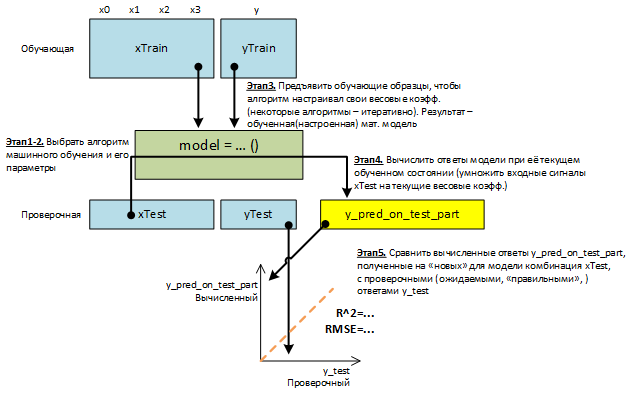

## Одномерная модель от признака 'carat'

Для получения линейной регрессионной модели созданим экземпляр класс
__sklearn.linear_model.LinearRegression()__

In [84]:
model_carat = linear_model.LinearRegression()

Полученная модель требует процедуры обучения - подбора значений коэфф. для минимизации отличий между вычисленными значениями и предоставленными целевыми (обучающими y). У большинства моделей доступен метод __.fit(x_train, y_train)__

In [85]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
model_carat.fit(
    x_train[['carat']],
    y_train[['price']]
)

LinearRegression()

Важным этапом является получение ответов от обученной модели, вычисленных на той части данных, которая не учавствовала в обучении (т.е не учавствовала в подстройке коэфф. мат. модели)

In [86]:
# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_predicted_on_carat = model_carat.predict(x_test[['carat']])

Для наглядности построим график рассеяния (он же график разброса, точечный, scatter) зависимой величины y от единственного определяющего признака

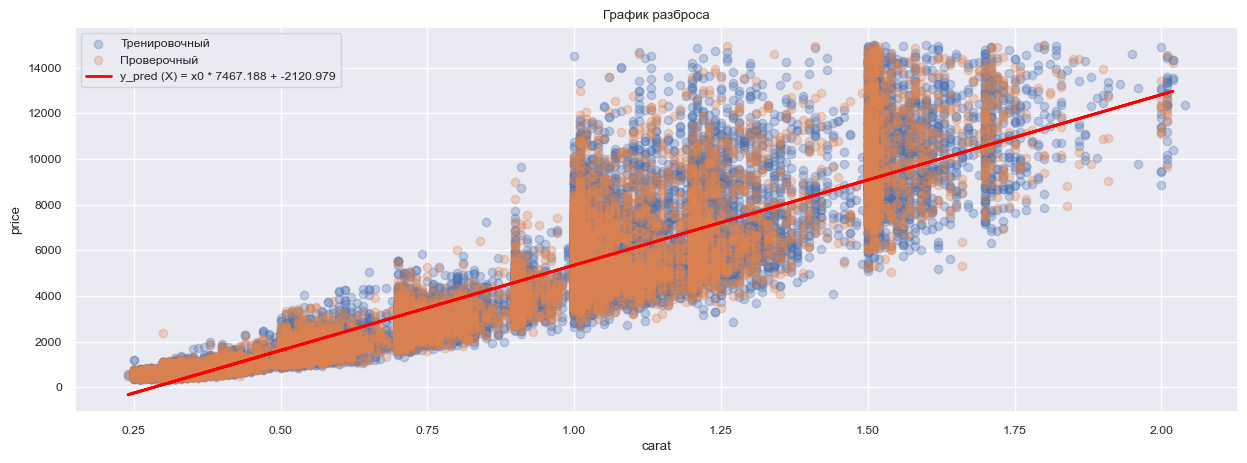

In [87]:
# Создать полотно для рисования с указаными размерами
plt.figure(figsize=(15,5))

# Точечная диаграмма (диаграмма рассеяния) - plt.scatter
plt.scatter(x_train[['carat']],  y_train[['price']], alpha=0.3, label='Тренировочный') # тренировочный
plt.scatter(x_test[['carat']],   y_test[['price']],  alpha=0.3, label='Проверочный')   # проверочный

# Нанести график - линии, проведённые через точки - plt.plot
plt.plot( x_test[['carat']], y_predicted_on_carat,
          lw=2, color='red',
          label="y_pred (X) = x0 * {:.3f} + {:.3f}".format(model_carat.coef_[0][0], model_carat.intercept_[0]))
plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7
plt.legend(loc="best")  # Положение легенды
plt.xlabel('carat') # Подпись осей
plt.ylabel(target[0])   # Подпись осей
plt.title(u'График разброса'); # Заголовок

Т.к. модель является линейной имеются некоторые расхождения между реальными и вычисленными значениями - "ошибки". Для оценки точности построим гистограмму распределения ошибок

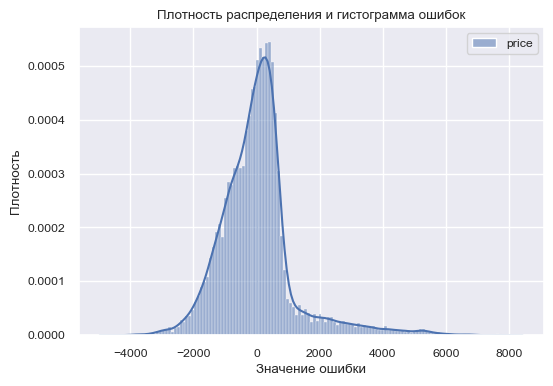

In [88]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_predicted_on_carat,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Построим еще пару графиков для визуальной оценки качества модели:
- график рассеяния вычисленных значений Y_pred от проверочных значений Y_test;
- график квадратов ошибок от проверочных значний Y_test.

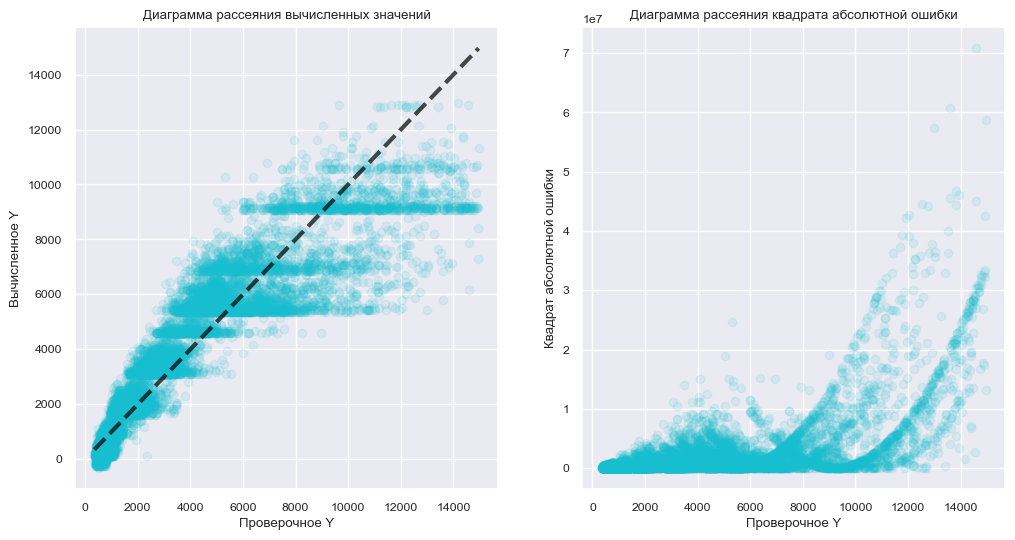

In [89]:
def PLOT34(y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(12,6))

    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1, color = "#17becf")
    plt.plot(  [ np.min(y_test), np.max(y_test) ], # x1,x2
               [ np.min(y_test), np.max(y_test) ], # y1,y2
               '--',
               alpha=0.7, lw=3, color = "black")
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7

    # == Диаграмма рассеяния ошибок ==
    # создать второе полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1, color = "#17becf")
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7
#--------------------------------------------------------------------------

PLOT34(
    y_test = y_test[['price']],
    y_pred = y_predicted_on_carat
)

С помощью функций __sklearn.metrics.*__ сравним реальные и вычисленные значениямя и получим важные оценки качества модели

In [90]:
print ("Линейная одномерная регрессия. Признак 'YearBuilt'.")
print ("Формула линейной регресси y(X) = k0*x0 + ... kN*xN + b")
print(f"y = f(X) = ")
for i, kN in enumerate (model_carat.coef_):
    print(f" {' ' if i==0 else '+'}  {kN[0]:.3f} * x{i} ")
print(f"+ {model_carat.intercept_[0]:.3f} ")
print("\n")

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_predicted_on_carat)
mse  = metrics.mean_squared_error (y_test, y_predicted_on_carat)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_predicted_on_carat)
print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

Линейная одномерная регрессия. Признак 'YearBuilt'.
Формула линейной регресси y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
    7467.188 * x0 
+ -2120.979 


MAE :   821.094 (средняя абсолютная ошибка)
MSE : 1,484,203.342797 (среднеквадратичная ошибка)
RMSE: 1,218.278844 (кв. корень из среднеквадратичной ошибки)
R2  :     0.852 (коэфф. детерминации)


## Многомерная модель от  набора признаков ['carat', 'color_grade', 'clarity_grade']

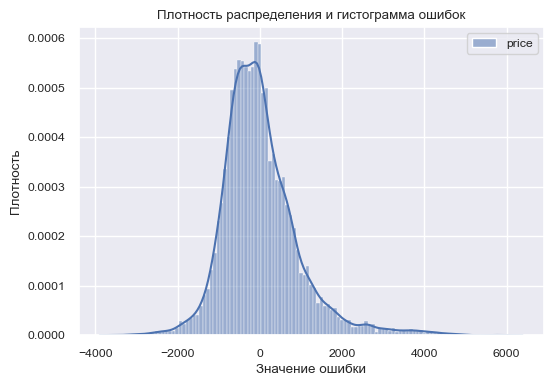

In [91]:
model_multy = linear_model.LinearRegression()
model_multy.fit(
    x_train[['carat', 'color_grade', 'clarity_grade']],
    y_train[['price']]
)
y_predicted_on_multy = model_multy.predict(x_test[['carat', 'color_grade', 'clarity_grade']])
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_predicted_on_multy,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

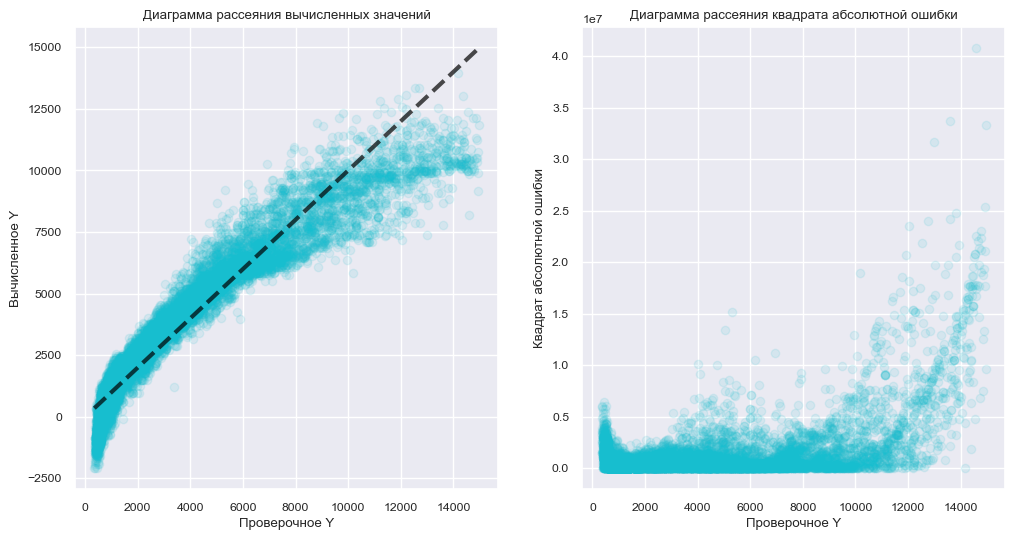

In [92]:
PLOT34(
    y_test = y_test[['price']],
    y_pred = y_predicted_on_multy
)

In [93]:
print ("Линейная многомерная регрессия. Признаки 'carat', 'clarity_grade', 'color_grade'.")
print ("Формула линейной регресси y(X) = k0*x0 + ... kN*xN + b")
print(f"y = f(X) = ")
for i, kN in enumerate (model_multy.coef_[0]):
    print(f" {' ' if i==0 else '+'}  {kN:.3f} * x{i} ")
print(f"+ {model_multy.intercept_[0]:.3f} ")
print("\n")

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_predicted_on_multy)
mse  = metrics.mean_squared_error (y_test, y_predicted_on_multy)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_predicted_on_multy)
print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

Линейная многомерная регрессия. Признаки 'carat', 'clarity_grade', 'color_grade'.
Формула линейной регресси y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
    8301.985 * x0 
 +  263.422 * x1 
 +  748.654 * x2 
+ -6602.857 


MAE :   671.851 (средняя абсолютная ошибка)
MSE : 875,974.887225 (среднеквадратичная ошибка)
RMSE: 935.935301 (кв. корень из среднеквадратичной ошибки)
R2  :     0.912 (коэфф. детерминации)


## Многомерная модель от  набора признаков ['x', 'y', 'z']

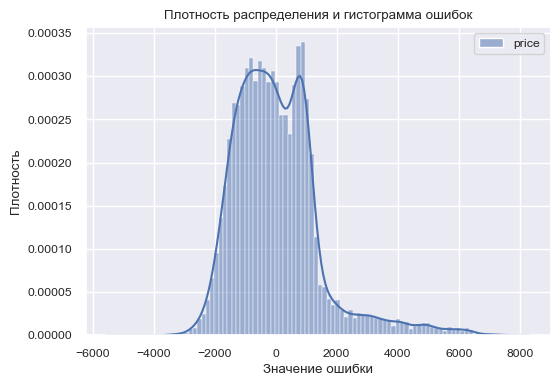

In [94]:
model_multy2 = linear_model.LinearRegression()
model_multy2.fit(
    x_train[['x', 'y', 'z']],
    y_train[['price']]
)
y_predicted_on_multy2 = model_multy2.predict(x_test[['x', 'y', 'z']])
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_predicted_on_multy2,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 10 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

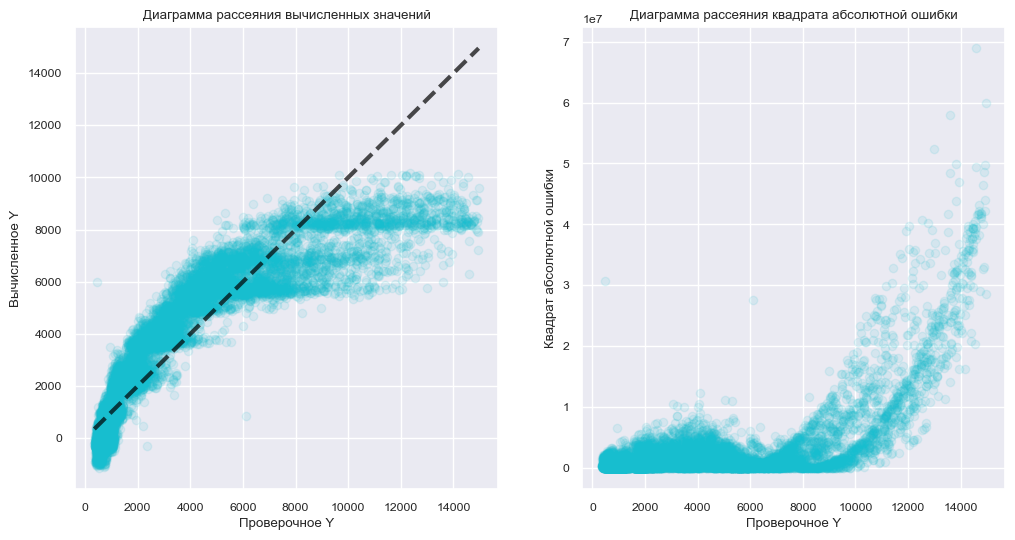

In [95]:
PLOT34(
    y_test = y_test[['price']],
    y_pred = y_predicted_on_multy2
)

In [96]:
print ("Линейная многомерная регрессия. Признаки 'x', 'y', 'z'.")
print ("Формула линейной регресси y(X) = k0*x0 + ... kN*xN + b")
print(f"y = f(X) = ")
for i, kN in enumerate (model_multy2.coef_):
    print(f" {' ' if i==0 else '+'}  {kN[0]:.3f} * x{i} ")
print(f"+ {model_multy2.intercept_[0]:.3f} ")
print("\n")

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_predicted_on_multy2)
mse  = metrics.mean_squared_error (y_test, y_predicted_on_multy2)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_predicted_on_multy2)
print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

Линейная многомерная регрессия. Признаки 'x', 'y', 'z'.
Формула линейной регресси y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
    -135.245 * x0 
+ -12506.763 


MAE : 1,048.438 (средняя абсолютная ошибка)
MSE : 2,016,018.452642 (среднеквадратичная ошибка)
RMSE: 1,419.865646 (кв. корень из среднеквадратичной ошибки)
R2  :     0.798 (коэфф. детерминации)


# Итоги. Сравнение полученных моделей

Основные численные значения полученные в работе:
- Размеры таблиц данных на этапах:
  - исходная таблица при загрузке csv-файла = (53940, 11)
  - после исключения пропущенных значений = (53711, 10)
  - после исключения выбросов = (48076, 10)

Численные оценки всех моделей для более удобного сравнения:

      M1. Линейная одномерная регрессия. Признаки: 'carat'.
        Формула линейной регрессиy = f(X) = 7434.977 * x0 + -2119.975 
        MAE :   824.268 (средняя абсолютная ошибка)
        MSE : 1,494,471.923732 (среднеквадратичная ошибка)
        RMSE: 1,222.485961 (кв. корень из среднеквадратичной ошибки)
        R2  :     0.846 (коэфф. детерминации)

      M2. Линейная многомерная регрессия. Признаки: 'carat', 'clarity_grade', 'color_grade' .
        Формула линейной регресси y = f(X) = 8289.336 * x0 + -6660.853 
        MAE :   681.633 (средняя абсолютная ошибка)
        MSE : 889,962.339566 (среднеквадратичная ошибка)
        RMSE: 943.378153 (кв. корень из среднеквадратичной ошибки)
        R2  :     0.908 (коэфф. детерминации)
      
      M3. Линейная многомерная регрессия. Признаки: 'x', 'y', 'z' .
        Формула линейной регресси y = f(X) = -150.596 * x0 + -12489.731 
        MAE : 1,041.749 (средняя абсолютная ошибка)
        MSE : 1,991,096.936894 (среднеквадратичная ошибка)
        RMSE: 1,411.062343 (кв. корень из среднеквадратичной ошибки)
        R2  :     0.795 (коэфф. детерминации)


Оцените в минутах время затраченное на выполнение основных этапов текущей работы, согласно методологии CRISP, затем заполните эту информацию в следующей ячейке для получения столбчатой диаграммы.

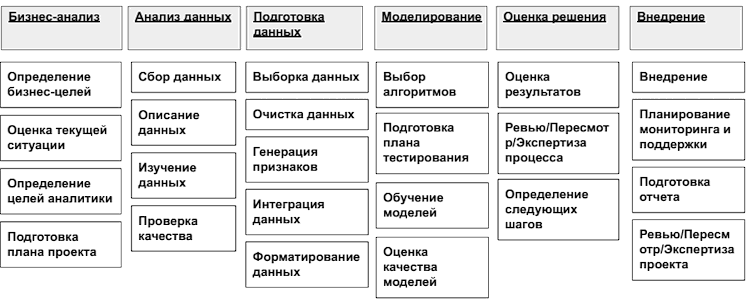

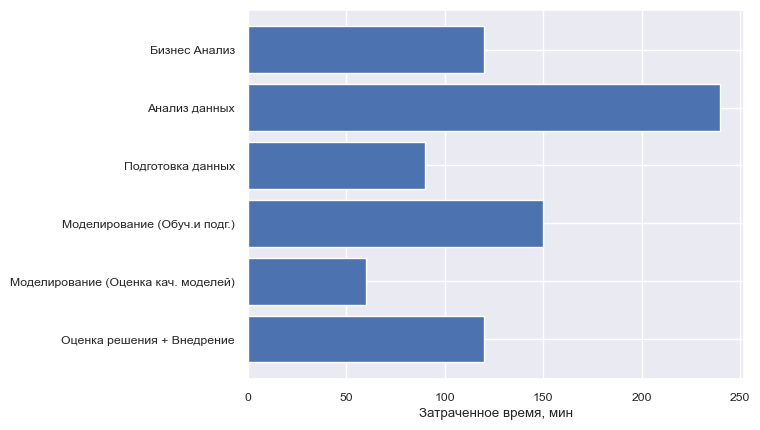

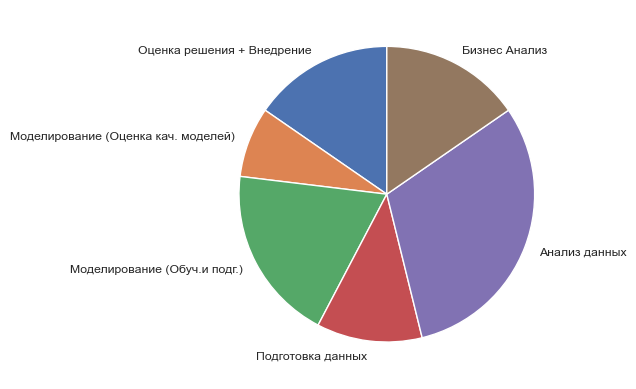

In [97]:
# Создадим датафрейм для хранения значений
dfSpendTimeLab1 = pd.DataFrame.from_dict(
{
  "1": {"step": "Бизнес Анализ",                       "duration, min" :  120  },
  "2": {"step": "Анализ данных",                       "duration, min" :  240  },
  "3": {"step": "Подготовка данных",                   "duration, min" :  90  },
  "4": {"step": "Моделирование (Обуч.и подг.)",        "duration, min" :  150  },
  "5": {"step": "Моделирование (Оценка кач. моделей)", "duration, min" :  60  },
  "6": {"step": "Оценка решения + Внедрение",          "duration, min" :  120  },
}
, orient="index"
).sort_index(ascending=False)

# Построить столбчатую диаграмму
fig = plt.figure()
plt.barh(y = dfSpendTimeLab1["step"], width= dfSpendTimeLab1["duration, min"], )
plt.xlabel("Затраченное время, мин")

# Построить круговую диаграмму
fig = plt.figure()
plt.pie(x= dfSpendTimeLab1["duration, min"], labels=dfSpendTimeLab1["step"],  startangle = 90 )

plt.show()

# Выводы по работе

- Максимальное значение метрики R2 имеет модель М2 и оно равно 0.908
- Если взять за максимальное значение метрику R2 у модели М2,то у модели М1 значение R2 в 1.07 раза меньше, а у модели М3  в 1.12 раза
- Необходимыми для увеличения R2 являются признаки, которые имеют наиболее высокую корреляцию с целевым признаком, но при этом если модель многомерная, то признаки должны также иметь наименьшую корреляцию с другими признаками, взятыми для построения модели
- Метрика R2 увеличивается при дополнении одних признаков другими, так как модель становится более точной, а метрика R2 отражает то на сколько исходные данные совпадают с вычисленными